<a href="https://colab.research.google.com/github/tirals88/DL_for_everyone/blob/main/deeplearning/notebook/14%EC%9E%A5%20%EB%B2%A0%EC%8A%A4%ED%8A%B8%20%EB%AA%A8%EB%8D%B8%20%EB%A7%8C%EB%93%A4%EA%B8%B0(keras.callbacks%20%ED%95%A8%EC%88%98)%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

'모두의 딥러닝' 책 스터디 내용을 jupyter notebook으로 정리하여 올립니다.

Github 주소 : 'https://github.com/gilbutITbook/080228'

**모두의 딥러닝**

# 14 장 베스트 모델 만들기

이번 장에서는 레드와인과 화이트와인을 구분하는 모델을 볼 것이다.
데이터는 레드와인 샘플 1599개를 등급과 맛, 산도를 측정해 분석하고, 화이트와인 샘플 4898개를 마찬가지로 분석해 하나로 합친 것이다.

In [2]:
# 데이터 확인
import pandas as pd

df_pre = pd.read_csv('https://raw.githubusercontent.com/gilbutITbook/080228/master/deeplearning/dataset/wine.csv', header=None)
df = df_pre.sample(frac=1)

sample 함수는 원본 데이터에서 정해진 비율만큼 랜덤으로 뽑아오는 함수이다.

frac = 1 이라고 지정하면 원본 데이터의 100%를 랜덤으로 불러오라는 의미이다.

frac = .5 로 지정하면 50%만 랜덤으로 불러온다.

In [3]:
#랜덤으로 모두 불러온 원본 데이터 처음 5줄 출력
print(df.head(5))

       0      1     2    3      4     5      6        7     8     9     10  \
5163  6.6  0.640  0.28  4.4  0.032  19.0   78.0  0.99036  3.11  0.62  12.9   
463   8.1  0.660  0.70  2.2  0.098  25.0  129.0  0.99720  3.08  0.53   9.0   
1040  7.4  0.965  0.00  2.2  0.088  16.0   32.0  0.99756  3.58  0.67  10.2   
85    6.9  0.550  0.15  2.2  0.076  19.0   40.0  0.99610  3.41  0.59  10.1   
6465  5.7  0.410  0.21  1.9  0.048  30.0  112.0  0.99138  3.29  0.55  11.2   

      11  12  
5163   6   0  
463    5   1  
1040   5   1  
85     5   1  
6465   6   0  


한 줄당 모두 13개의 정보가 있는 것을 확인할 수 있다.


In [5]:
#전체 정보 출력
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 5163 to 3719
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       6497 non-null   float64
 1   1       6497 non-null   float64
 2   2       6497 non-null   float64
 3   3       6497 non-null   float64
 4   4       6497 non-null   float64
 5   5       6497 non-null   float64
 6   6       6497 non-null   float64
 7   7       6497 non-null   float64
 8   8       6497 non-null   float64
 9   9       6497 non-null   float64
 10  10      6497 non-null   float64
 11  11      6497 non-null   int64  
 12  12      6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB
None


처음 12개의 데이터는 와인의 pH, 알코올 도수, 염화나트륨 농도, 맛(~10 등급) 등의 정보이고, 13번째 데이터 'class' 는 1 : 레드와인, 0 : 화이트와인을 나타낸다.

In [6]:
dataset = df.values
X = dataset[:, 0:12]
Y = dataset[:, 12]

In [13]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping

import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

#seed 값 설정
seed = 3
np.random.seed(seed)
tf.random.set_seed(seed)

#모델 설정
model = Sequential()
model.add(Dense(30, input_dim = 12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#모델 컴파일
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
#모델 실행
model.fit(X, Y, epochs=200, batch_size=200)

print("\n Accuracy: %.4f" % (model.evaluate(X, Y)[1]))

Epoch 1/200
33/33 [==============================] - 1s 3ms/step - loss: 26.9945 - accuracy: 0.2461
Epoch 2/200
33/33 [==============================] - 0s 3ms/step - loss: 3.2940 - accuracy: 0.5723
Epoch 3/200
33/33 [==============================] - 0s 3ms/step - loss: 0.3705 - accuracy: 0.9098
Epoch 4/200
33/33 [==============================] - 0s 3ms/step - loss: 0.2530 - accuracy: 0.9230
Epoch 5/200
33/33 [==============================] - 0s 3ms/step - loss: 0.2284 - accuracy: 0.9283
Epoch 6/200
33/33 [==============================] - 0s 2ms/step - loss: 0.2133 - accuracy: 0.9344
Epoch 7/200
33/33 [==============================] - 0s 2ms/step - loss: 0.1994 - accuracy: 0.9366
Epoch 8/200
33/33 [==============================] - 0s 3ms/step - loss: 0.1894 - accuracy: 0.9387
Epoch 9/200
33/33 [==============================] - 0s 3ms/step - loss: 0.1789 - accuracy: 0.9409
Epoch 10/200
33/33 [==============================] - 0s 2ms/step - loss: 0.1713 - accuracy: 0.9417
Epoch 11

모델의 저장과 재사용은 이전 장에서 다음과 같이 배웠다
```
import keras.models
#앞서 학습한 모델을 저장
model.save('my_model.h5')

#모델을 다시 불러옴
model = keras.models.load_model('/content/my_model.h5')

```
이번에는 에포크마다 모델의 정확도를 함께 기록하면서 저장을 해볼 것이다.

먼저 폴더를 지정하고 파일이름은 hdf5라는 확장자로 저장한다.</br>그리고 에포크 횟수와 테스트셋 오차 값을 이용하여 파일 이름을 만드는데 100번째 에포크에 오차가 0.0612라면 파일명은 **100-0.0612.hdf5**가 된다.

```
import os

MODEL_DIR = './model/'              #모델을 저장하는 폴더
if not os.path.exists(MODEL_DIR):   #해당 위치에 폴더가 존재하지 않으면
  os.mkdir(MODEL_DIR)               #폴더 생성

modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
```

이제 모델을 저장하기 위해 케라스의 콜백 함수 중 ModelCheckpoint() 함수를 불러온다.

그리고 checkpointer라는 변수를 만들어 모니터할 값을 지정한다.

(케라스 내부에서 학습 정확도 : 'acc', 학습셋 오차 : 'loss', 테스트셋 정확도 : 'val_acc', 테스트셋 오차 : 'val_loss')

모델이 저장될 곳을 앞서 만든 modelpath로 지정하고 verbose의 값을 1로 정하면 해당 함수의 진행 사항이 출력되고, 0으로 정하면 출력되지 않는다.

이제 모델을 학습할 때마다 위에서 정한 checkpointer의 값을 받아 지정된 곳에 모델을 저장한다.
```
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss, verbose=1)

model.fit(X, Y, validation_split=0.2, epochs=200, batch_size=200, verbose=0, callbacks=[checkpointer])
```

In [ ]:
import os

MODEL_DIR = './model/'              #모델을 저장하는 폴더
if not os.path.exists(MODEL_DIR):   #해당 위치에 폴더가 존재하지 않으면
  os.mkdir(MODEL_DIR)               #폴더 생성

modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"

from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1)

model.fit(X, Y, validation_split=0.2, epochs=200, batch_size=200, verbose=0, callbacks=[checkpointer])

출력된 코드 일부
```
Epoch 196: saving model to ./model/196-0.0446.hdf5

Epoch 197: saving model to ./model/197-0.0464.hdf5

Epoch 198: saving model to ./model/198-0.0532.hdf5

Epoch 199: saving model to ./model/199-0.0459.hdf5

Epoch 200: saving model to ./model/200-0.0474.hdf5
```

In [9]:
#앞서 저장한 모델보다 나아졌을 때만 저장
checkpointer.save_best_only = True

#checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

In [ ]:
#수정된 전체 코드
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping

import pandas as pd
import numpy as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt

#seed 값 설정
seed = 3
np.random.seed(seed)
tf.random.set_seed(seed)

#모델 설정
model = Sequential()
model.add(Dense(30, input_dim = 12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#모델 컴파일
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
#모델 저장 폴더 설정
MODEL_DIR = './re_model/'              #모델을 저장하는 폴더
if not os.path.exists(MODEL_DIR):      #해당 위치에 폴더가 존재하지 않으면
  os.mkdir(MODEL_DIR)                  #폴더 생성

#모델 저장 조건 설정
modelpath="./re_model/{epoch:03d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, moniter='val_loss', verbose=1, save_best_only=True)

#모델 실행
model.fit(X, Y, validation_split=0.2, epochs=200, batch_size=200, verbose=0, callbacks=[checkpointer])

#print("\n Accuracy: %.4f" % (model.evaluate(X, Y)[1]))

출력된 코드 일부
```
Epoch 177: val_loss did not improve from 0.04985

Epoch 178: val_loss did not improve from 0.04985

Epoch 179: val_loss improved from 0.04985 to 0.04979, saving model to ./re_model/179-0.0498.hdf5

Epoch 180: val_loss did not improve from 0.04979

Epoch 181: val_loss did not improve from 0.04979

Epoch 182: val_loss improved from 0.04979 to 0.04969, saving model to ./re_model/182-0.0497.hdf5

Epoch 183: val_loss did not improve from 0.04969

Epoch 184: val_loss did not improve from 0.04969
```

이번에는 딥러닝 프레임워크가 만들어 낸 모델을 업데이트하는 과정을 알아볼 것이다.

먼저 에포크를 얼마나 지정할지를 결정해야 한다.

모델의 학습 시간에 따른 정확도와 테스트 결과를 그래프를 통해 확인해 볼 것이다.

```
df = df_pre.sample(frac=0.15)

history=model.fit(X, Y, validation_split=0.33, epochs=3500, batch_size=500)
```
모델이 학습되는 과정을 history변수를 만들어 저장하고 긴 학습의 예를 지켜보기 위해 에포크를 3500으로 조정하고 시간을 오래걸리지 않게 하기 위해 sample() 함수를 통해 15%의 데이터만들을 불러온다.

배치 크기는 500으로 하여 한 번 가동할 때 더 많은 입력을 받게끔 하였다.


다음으로 그래프로 표현하기 위해 오차와 정확도 값을 정하여 저장한다.
```
import matplotlib.pyplot as plt

y_vloss=history.history['val_loss']
y_acc=history.history['acc']
```

x 값을 지정하고 정확도를 파란색으로, 오차를 빨간색으로 표시해본다.

```
x_len = np.arange(len(y_acc))
plt.plot(x_len, y_vloss, "o", c="red", markersize=3)
plt.plot(x_len, y_acc, "o", c="blue", markersize=3)
```

In [ ]:
#전체 코드

#수정된 전체 코드
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping

import pandas as pd
import numpy as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt

#seed 값 설정
seed = 3
np.random.seed(seed)
tf.random.set_seed(seed)

df_pre = pd.read_csv('https://raw.githubusercontent.com/gilbutITbook/080228/master/deeplearning/dataset/wine.csv', header=None)
df = df_pre.sample(frac=0.15)

dataset=df.values
X = dataset[:, :12]
Y = dataset[:, 12]

#모델 설정
model = Sequential()
model.add(Dense(30, input_dim = 12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#모델 컴파일
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
#모델 저장 폴더 설정
MODEL_DIR = './re_model/'              #모델을 저장하는 폴더
if not os.path.exists(MODEL_DIR):      #해당 위치에 폴더가 존재하지 않으면
  os.mkdir(MODEL_DIR)                  #폴더 생성

#모델 저장 조건 설정
modelpath="./re_model/{epoch:03d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, moniter='val_loss', verbose=1, save_best_only=True)

#모델 실행 및 저장
history = model.fit(X, Y, validation_split=0.33, epochs=3500, batch_size=500)

#print("\n Accuracy: %.4f" % (model.evaluate(X, Y)[1]))

출력 코드 일부

Epoch : 1000번대
```
Epoch 1002/3500
2/2 [==============================] - 0s 86ms/step - loss: 0.0275 - accuracy: 0.9908 - val_loss: 0.0754 - val_accuracy: 0.9752
Epoch 1003/3500
2/2 [==============================] - 0s 58ms/step - loss: 0.0302 - accuracy: 0.9877 - val_loss: 0.0721 - val_accuracy: 0.9814
Epoch 1004/3500
2/2 [==============================] - 0s 63ms/step - loss: 0.0283 - accuracy: 0.9908 - val_loss: 0.0720 - val_accuracy: 0.9814
Epoch 1005/3500
2/2 [==============================] - 0s 73ms/step - loss: 0.0286 - accuracy: 0.9908 - val_loss: 0.0719 - val_accuracy: 0.9814
Epoch 1006/3500
2/2 [==============================] - 0s 55ms/step - loss: 0.0271 - accuracy: 0.9893 - val_loss: 0.0736 - val_accuracy: 0.9814
```
Epoch : 3500 대

```
Epoch 3496/3500
2/2 [==============================] - 0s 70ms/step - loss: 0.0018 - accuracy: 0.9985 - val_loss: 0.1746 - val_accuracy: 0.9783
Epoch 3497/3500
2/2 [==============================] - 0s 56ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.1773 - val_accuracy: 0.9783
Epoch 3498/3500
2/2 [==============================] - 0s 62ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.1814 - val_accuracy: 0.9783
Epoch 3499/3500
2/2 [==============================] - 0s 72ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.1827 - val_accuracy: 0.9783
Epoch 3500/3500
2/2 [==============================] - 0s 50ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.1822 - val_accuracy: 0.9783
```

train_set 의 정확도는 100%에 가까워지지만, val_loss 는 오히려 증가하여 과적합이 일어난 양상을 확인할 수 있다.


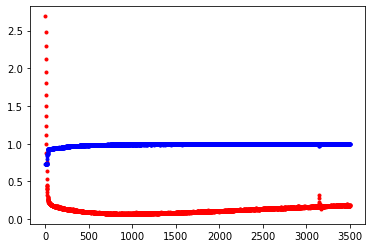

In [25]:
y_vloss=history.history['val_loss']
y_acc=history.history['accuracy']

x_len = np.arange(len(y_acc))

plt.plot(x_len, y_vloss, "o", c="red", markersize=3)
plt.plot(x_len, y_acc, "o", c="blue", markersize=3)

plt.show()

##EarlyStopping

이럴 떄 사용할 수 있는 함수로 케라스의 EarlyStopping()이 있다.

EarlyStopping() 함수는 모니터할 값과 테스트 오차가 좋아지지 않아도 몇 번 까지 기다릴지를 정한다.

이를 early_stopping_callback 에 저장한다.

```
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=100)

model.fit(X, Y, validation_split=0.33, epochs=2000, batch_size=500, callbacks=[early_stopping_callback])
```



In [ ]:
#EarlyStopping 도입 후 코드
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping

import pandas as pd
import numpy as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt

#seed 값 설정
seed = 3
np.random.seed(seed)
tf.random.set_seed(seed)

df_pre = pd.read_csv('https://raw.githubusercontent.com/gilbutITbook/080228/master/deeplearning/dataset/wine.csv', header=None)
df = df_pre.sample(frac=0.15)

dataset=df.values
X = dataset[:, :12]
Y = dataset[:, 12]

#모델 설정
model = Sequential()
model.add(Dense(30, input_dim = 12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#모델 컴파일
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#학습 자동 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=100)

#모델 실행
history=model.fit(X, Y, validation_split=0.2, epochs=2000,
                  batch_size=500, callbacks=[early_stopping_callback])

print("\n Accuracy: %.4f" %(model.evaluate(X, Y)[1]))

출력 코드 마지막 부분
```
Epoch 1191/2000
2/2 [==============================] - 0s 70ms/step - loss: 0.0212 - accuracy: 0.9910 - val_loss: 0.0599 - val_accuracy: 0.9846
Epoch 1192/2000
2/2 [==============================] - 0s 68ms/step - loss: 0.0250 - accuracy: 0.9897 - val_loss: 0.0590 - val_accuracy: 0.9846
Epoch 1193/2000
2/2 [==============================] - 0s 48ms/step - loss: 0.0201 - accuracy: 0.9923 - val_loss: 0.0580 - val_accuracy: 0.9897
Epoch 1194/2000
2/2 [==============================] - 0s 64ms/step - loss: 0.0254 - accuracy: 0.9897 - val_loss: 0.0621 - val_accuracy: 0.9846
Epoch 1195/2000
2/2 [==============================] - 0s 55ms/step - loss: 0.0230 - accuracy: 0.9872 - val_loss: 0.0647 - val_accuracy: 0.9846
31/31 [==============================] - 0s 3ms/step - loss: 0.0315 - accuracy: 0.9908

 Accuracy: 0.9908
 ```

에포크는 2000 이었지만, 도중에 멈추는 것을 볼 수 있다.

총 1195의 학습이 진행되었고 100번 전의 학습인 1095의 val_loss 가 0.0570으로 가장 작은 수임을 확인해볼 수 있다.

min value of 'val_loss': 0.0570, and its index : 1094


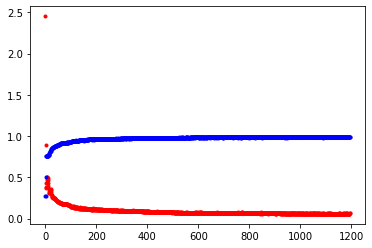

In [36]:
y_vloss=history.history['val_loss']
y_acc=history.history['accuracy']

x_len = np.arange(len(y_acc))

min = np.min(y_vloss)

print("min value of \'val_loss\': %.04f, and its index : %.04d" % (min, y_vloss.index(min)))
plt.plot(x_len, y_vloss, "o", c="red", markersize=3)
plt.plot(x_len, y_acc, "o", c="blue", markersize=3)

plt.show()

이제 위에서 시도했던 모델 업데이트 함수와 EarlyStopping 을 동시에 사용할 수 있다.

In [ ]:
#전체 코드

from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping

import pandas as pd
import numpy as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt

#seed 값 설정
seed = 3
np.random.seed(seed)
tf.random.set_seed(seed)

df_pre = pd.read_csv('https://raw.githubusercontent.com/gilbutITbook/080228/master/deeplearning/dataset/wine.csv', header=None)
df = df_pre.sample(frac=0.15)

dataset=df.values
X = dataset[:, :12]
Y = dataset[:, 12]

#모델 설정
model = Sequential()
model.add(Dense(30, input_dim = 12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#모델 컴파일
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#모델 저장 폴더 생성 및 업데이트/저장
MODEL_DIR = './final_model/'
if not os.path.exists(MODEL_DIR):
  os.mkdir(MODEL_DIR)

modelpath='./final_model/{epoch:.02f}-{val_loss:.4f}.hdf5'

checkpointer=ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
#학습 자동 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=100)

#모델 실행
model.fit(X, Y, validation_split=0.2, epochs=3500, batch_size=500, verbose=0, callbacks=[early_stopping_callback, checkpointer])

print("\n Accuracy: %.4f" %(model.evaluate(X, Y)[1]))

출력 코드 일부
```
Epoch 607: val_loss did not improve from 0.07344

Epoch 608: val_loss improved from 0.07344 to 0.07108, saving model to ./final_model/608.00-0.0711.hdf5

Epoch 609: val_loss improved from 0.07108 to 0.07023, saving model to ./final_model/609.00-0.0702.hdf5

Epoch 610: val_loss did not improve from 0.07023

Epoch 611: val_loss did not improve from 0.07023

Epoch 612: val_loss did not improve from 0.07023
```
```
Epoch 706: val_loss did not improve from 0.07023

Epoch 707: val_loss did not improve from 0.07023

Epoch 708: val_loss did not improve from 0.07023

Epoch 709: val_loss did not improve from 0.07023
31/31 [==============================] - 0s 3ms/step - loss: 0.0521 - accuracy: 0.9846

 Accuracy: 0.9846
 ```
 609번째 학습에서 마지막 갱신 및 저장이 이루어지고 이후 100번의 학습 동안 val_loss 의 갱신이 이루어지지 않아 학습이 중단된 것을 볼 수 있다.

크게 총 두가지의 keras 콜백 함수를 배웠다.
- ModelCheckpoint : 학습이 진행될 때 마다 모델을 저장할 수 있게 해주며, **'save_best_only=True'**를 통해 모니터하는 값이 갱신이 될 때만 저장하도록 설정할 수 있다.

- EarlyStopping : 모니터하는 값이 **patience=number**로 정한 만큼 갱신되지 않을 때 그 이상 과적합을 방지하기 위해 학습을 자동 중단시켜준다.